# Question 2 :  L’homme n’a aucun impact sur le réchauffement climatique.




In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_style('darkgrid')
from matplotlib import style 
style.use('ggplot') or plt.style.use('ggplot')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data set earth temperature

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1hdQfXlGmjo3yI5u4mg8VRBAGR0hR1WvyhetDcANZld8/edit#gid=0')

In [0]:
sheet = wb.worksheet('CO2EmissionsEnergySubSector')

In [0]:
data = sheet.get_all_values()

In [0]:
df = pd.DataFrame(data)

In [0]:
df.shape

(7897, 7)

In [0]:
df.head()

0  ...                                 6
0      Country  ...  Fugitive Emissions (CO2) (MtCO2)
1  Afghanistan  ...                                  
2      Albania  ...                                  
3      Algeria  ...                                  
4       Angola  ...                                  

[5 rows x 7 columns]

### Nettoyage des données

In [0]:
df.columns = df.iloc[0]
df = df.iloc[1:]
df.reset_index(drop=True, inplace=True)

In [0]:
df.head()

0            Country  ... Fugitive Emissions (CO2) (MtCO2)
0        Afghanistan  ...                                 
1            Albania  ...                                 
2            Algeria  ...                                 
3             Angola  ...                                 
4  Antigua & Barbuda  ...                                 

[5 rows x 7 columns]

In [0]:
# Regarder les types des données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Country                                   7896 non-null   object
 1   Year                                      7896 non-null   object
 2   Electricity/Heat (CO2) (MtCO2)            7896 non-null   object
 3   Manufacturing/Construction (CO2) (MtCO2)  7896 non-null   object
 4   Transportation (CO2) (MtCO2)              7896 non-null   object
 5   Other Fuel Combustion (CO2) (MtCO2)       7896 non-null   object
 6   Fugitive Emissions (CO2) (MtCO2)          7896 non-null   object
dtypes: object(7)
memory usage: 431.9+ KB


In [0]:
df.isna().sum()

0
Country                                     0
Year                                        0
Electricity/Heat (CO2) (MtCO2)              0
Manufacturing/Construction (CO2) (MtCO2)    0
Transportation (CO2) (MtCO2)                0
Other Fuel Combustion (CO2) (MtCO2)         0
Fugitive Emissions (CO2) (MtCO2)            0
dtype: int64

In [0]:
# NOus allons uniquement récupérer les données World et modifier notre dataframe pour n'avoir que les données mondiales

df = df.loc[df['Country'] == 'World']
df

0    Country  ... Fugitive Emissions (CO2) (MtCO2)
184    World  ...                                 
372    World  ...                                 
560    World  ...                                 
748    World  ...                                 
936    World  ...                                 
1124   World  ...                                 
1312   World  ...                                 
1500   World  ...                                 
1688   World  ...                                 
1876   World  ...                           240,00
2064   World  ...                           179,76
2252   World  ...                           173,58
2440   World  ...                           200,34
2628   World  ...                           181,08
2816   World  ...                           158,16
3004   World  ...                           152,79
3192   World  ...                           151,28
3380   World  ...                           167,55
3568   World  ...                           179,41
3756   World  ...                           164,02
3944   World  ...                           233,17
4132   World  ...                           202,85
4320   World  ...                           200,85
4508   World  ...                           201,31
4696   World  ...                           216,98
4884   World  ...                           230,17
5072   World  ...                           204,44
5260   World  ...                           190,35
5448   World  ...                           182,09
5636   World  ...                           174,41
5824   World  ...                           158,04
6012   World  ...                           166,88
6200   World  ...                           166,73
6388   World  ...                           181,32
6576   World  ...                           226,88
6764   World  ...                           222,50
6952   World  ...                           237,91
7140   World  ...                           261,08
7328   World  ...                           243,04
7516   World  ...                           227,33
7704   World  ...                           227,11
7892   World  ...                           243,09

[42 rows x 7 columns]

In [0]:
df.isna().sum()

0
Country                                     0
Year                                        0
Electricity/Heat (CO2) (MtCO2)              0
Manufacturing/Construction (CO2) (MtCO2)    0
Transportation (CO2) (MtCO2)                0
Other Fuel Combustion (CO2) (MtCO2)         0
Fugitive Emissions (CO2) (MtCO2)            0
dtype: int64

In [0]:
# La conversion renvoit des NaN

#df['Electricity/Heat (CO2) (MtCO2)'] = pd.to_numeric(df['Electricity/Heat (CO2) (MtCO2)'], errors='coerce')
#df['Manufacturing/Construction (CO2) (MtCO2)'] = pd.to_numeric(df['Manufacturing/Construction (CO2) (MtCO2)'], errors='coerce')
#df['Transportation (CO2) (MtCO2)'] = pd.to_numeric(df['Transportation (CO2) (MtCO2)'], errors='coerce')
#df['Other Fuel Combustion (CO2) (MtCO2)'] = pd.to_numeric(df['Other Fuel Combustion (CO2) (MtCO2)'], errors='coerce')
df.head()



0   Country  ... Fugitive Emissions (CO2) (MtCO2)
184   World  ...                                 
372   World  ...                                 
560   World  ...                                 
748   World  ...                                 
936   World  ...                                 

[5 rows x 7 columns]

In [0]:
df = df.rename({'Electricity/Heat (CO2) (MtCO2)': 'Electricity/Heat', 
          'Manufacturing/Construction (CO2) (MtCO2)' : 'Manufacturing/Construction',
          'Transportation (CO2) (MtCO2)' : 'Transportation',
          'Other Fuel Combustion (CO2) (MtCO2)':  'Other_Fuel_Combustion',
          'Fugitive Emissions (CO2) (MtCO2)' : 'Fugitive_Emissions'  
           }, axis= 1)

In [0]:
df.head()

0   Country  Year  ... Other_Fuel_Combustion Fugitive_Emissions
184   World  1971  ...               2924,30                   
372   World  1972  ...               3033,12                   
560   World  1973  ...               3095,14                   
748   World  1974  ...               3014,31                   
936   World  1975  ...               3089,68                   

[5 rows x 7 columns]

In [0]:
df.drop(['Country'], axis=1, inplace=True)

In [0]:
df.head()

0    Year Electricity/Heat  ... Other_Fuel_Combustion Fugitive_Emissions
184  1971          4469,12  ...               2924,30                   
372  1972          4765,11  ...               3033,12                   
560  1973          5167,02  ...               3095,14                   
748  1974          5247,63  ...               3014,31                   
936  1975          5265,04  ...               3089,68                   

[5 rows x 6 columns]

In [0]:
# Les données object des colonnes ne sont pas au bon format : ',' à la place de '.'
# Nous allons les splitter

split1 = df['Electricity/Heat'].str.split(',', expand = True)
split2 = df['Manufacturing/Construction'].str.split(',', expand = True)
split3 = df['Transportation'].str.split(',', expand = True)
split4 = df['Other_Fuel_Combustion'].str.split(',', expand = True)
split5 = df['Fugitive_Emissions'].str.split(',', expand = True)


In [0]:
df['Electricity/Heat'] = split1[0] + '.' + split1[1]
df['Manufacturing/Construction'] = split2[0] + '.' + split2[1]
df['Transportation'] = split3[0] + '.' + split3[1]
df['Other_Fuel_Combustion'] = split4[0] + '.' + split4[1]
df['Fugitive_Emissions'] = split5[0] + '.' + split5[1]

In [0]:
df.head()

0    Year Electricity/Heat  ... Other_Fuel_Combustion Fugitive_Emissions
184  1971          4469.12  ...               2924.30                NaN
372  1972          4765.11  ...               3033.12                NaN
560  1973          5167.02  ...               3095.14                NaN
748  1974          5247.63  ...               3014.31                NaN
936  1975          5265.04  ...               3089.68                NaN

[5 rows x 6 columns]

In [0]:
df['Electricity/Heat'] = pd.to_numeric(df['Electricity/Heat'],errors='coerce')
df['Manufacturing/Construction'] = pd.to_numeric(df['Manufacturing/Construction'],errors='coerce')
df['Transportation'] = pd.to_numeric(df['Transportation'],errors='coerce')
df['Other_Fuel_Combustion'] = pd.to_numeric(df['Other_Fuel_Combustion'],errors='coerce')
df['Fugitive_Emissions'] = pd.to_numeric(df['Fugitive_Emissions'],errors='coerce')

In [0]:
df.isna().sum()

0
Year                          0
Electricity/Heat              0
Manufacturing/Construction    0
Transportation                0
Other_Fuel_Combustion         0
Fugitive_Emissions            9
dtype: int64

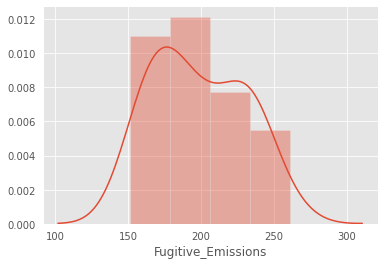

In [0]:
# Vérification des données pour remplacer les NAN soit par la moyenne soit par la médiane

sns.distplot(df["Fugitive_Emissions"])

# Nous allons prendre la médiane pour remplcer les 9 valeur NaN


In [0]:
df.describe().T

count         mean  ...         75%       max
0                                               ...                      
Electricity/Heat             42.0  8930.114286  ...  10797.8875  14903.97
Manufacturing/Construction   42.0  4776.911905  ...   4889.9000   6456.80
Transportation               42.0  4836.912619  ...   5857.5325   7186.97
Other_Fuel_Combustion        42.0  3190.278810  ...   3235.9950   3473.99
Fugitive_Emissions           33.0   198.378788  ...    227.1100    261.08

[5 rows x 8 columns]

In [0]:
df.head()

0    Year  Electricity/Heat  ...  Other_Fuel_Combustion  Fugitive_Emissions
184  1971           4469.12  ...                2924.30                 NaN
372  1972           4765.11  ...                3033.12                 NaN
560  1973           5167.02  ...                3095.14                 NaN
748  1974           5247.63  ...                3014.31                 NaN
936  1975           5265.04  ...                3089.68                 NaN

[5 rows x 6 columns]

In [0]:
# Remplacement des fillna par les données médiane : 200.34
# Test
df['Fugitive_Emissions'].fillna(df.Fugitive_Emissions.median() , inplace = True)
df.head()

0    Year  Electricity/Heat  ...  Other_Fuel_Combustion  Fugitive_Emissions
184  1971           4469.12  ...                2924.30              200.34
372  1972           4765.11  ...                3033.12              200.34
560  1973           5167.02  ...                3095.14              200.34
748  1974           5247.63  ...                3014.31              200.34
936  1975           5265.04  ...                3089.68              200.34

[5 rows x 6 columns]

In [0]:
df.isna().sum()

0
Year                          0
Electricity/Heat              0
Manufacturing/Construction    0
Transportation                0
Other_Fuel_Combustion         0
Fugitive_Emissions            0
dtype: int64

In [0]:
df.T

184      372   ...     7704     7892
0                                             ...                  
Year                           1971     1972  ...     2011     2012
Electricity/Heat            4469.12  4765.11  ...  14667.3    14904
Manufacturing/Construction  3831.73  3953.69  ...  6399.35   6456.8
Transportation              2859.64  3026.81  ...  7107.08  7186.97
Other_Fuel_Combustion        2924.3  3033.12  ...  3171.11   3186.6
Fugitive_Emissions           200.34   200.34  ...   227.11   243.09

[6 rows x 42 columns]

In [0]:
#df.set_index('Electricity/Heat',	'Manufacturing/Construction',	'Transportation',	'Other_Fuel_Combustion', 'Fugitive_Emissions')
copie = df.copy()

In [0]:
copie.set_index

<bound method DataFrame.set_index of 0     Year  Electricity/Heat  ...  Other_Fuel_Combustion  Fugitive_Emissions
184   1971           4469.12  ...                2924.30              200.34
372   1972           4765.11  ...                3033.12              200.34
560   1973           5167.02  ...                3095.14              200.34
748   1974           5247.63  ...                3014.31              200.34
936   1975           5265.04  ...                3089.68              200.34
1124  1976           5654.31  ...                3211.94              200.34
1312  1977           5888.35  ...                3229.88              200.34
1500  1978           6046.33  ...                3319.97              200.34
1688  1979           6267.18  ...                3360.91              200.34
1876  1980           6387.52  ...                3210.35              240.00
2064  1981           6368.25  ...                3150.69              179.76
2252  1982           6397.93  ...      

### Visualisation des Données

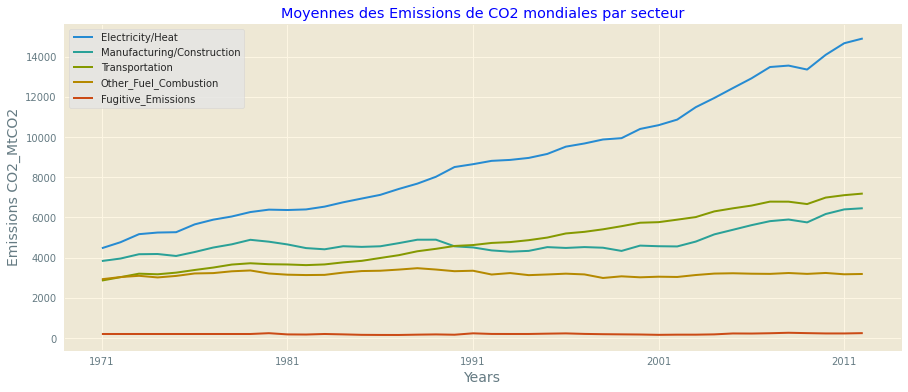

In [0]:
# Visualisation

labels = ['Electricity/Heat',	'Manufacturing/Construction',	'Transportation',	'Other_Fuel_Combustion', 'Fugitive_Emissions']
fig, axs = plt.subplots(5, 0, sharex=True, figsize=(15, 6))

with plt.style.context('Solarize_Light2'):
  axs[0] = sns.lineplot(x='Year', y = 'Electricity/Heat', data=df)
  axs[1] = sns.lineplot(x='Year', y = 'Manufacturing/Construction', data=df)
  axs[2] = sns.lineplot(x='Year', y = 'Transportation', data=df)
  axs[3] = sns.lineplot(x='Year', y = 'Other_Fuel_Combustion', data=df)
  axs[4] = sns.lineplot(x='Year', y = 'Fugitive_Emissions', data=df)

#axs.set_yticklabels('Emission CO2_MtCO2')
plt.title('Moyennes des Emissions de CO2 mondiales par secteur', color = 'blue')
plt.xlabel('Years', fontsize=14)
plt.gca().xaxis.set_ticks(range(0, 50, 10), minor = False)
plt.ylabel('Emissions CO2_MtCO2', fontsize=14)

plt.legend(labels)

plt.show()

fig.savefig("CO2parSecteur.png")


### Régression linéraire

In [0]:
# Modèles de regression linéaire
